<a href="https://colab.research.google.com/github/Will-be-big-man/Genetic-Algorithm-GA-_base_DL/blob/main/Made_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Wrokflow

1. Initialization
2. Evaluation
3. Choice
4. Crossover
5. Mutations

Desired results are possible 2 to 5

1. 부모 초기화
2. 평가
3. 선택
4. Crossover
5. Mutation

만약 원하는 결과가 아니라면 2 ~ 5 다시 진행



적합도 = 예측값, 예측값은 파라핀 분포의 비율이기 때문에 목표로 하는 값이 95% 라면 현재 알고리즘은 빈공간을 촬영한 것이기 때문에 5가 나와야함

In [2]:
import datetime
import random
import unittest
import copy
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from keras import models, optimizers, layers, regularizers
from keras.layers.normalization import layer_normalization
from keras.callbacks import EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf 
from pandas import DataFrame as df
from sklearn.metrics import mean_squared_error
import random
import torch

dataset = pd.read_csv('data_path', header = 1)
dataset = shuffle(dataset)
dataset = dataset.values
dataset = dataset.astype(float)

train_p = 0.6

# need to change according to data
len_data = dataset.shape[0]
x_train = dataset[: int(len_data * train_p) , :5 ]
y_train = dataset[: int(len_data * train_p) , [5] ]
x_test = dataset[ int(len_data *train_p) :  , :5 ]
y_test = dataset[ int(len_data * train_p) :  , [5]  ]

print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

# Randomly create a chromosome_list (specify the range) 
# 랜덤으로 chromosome_list를 만든다 (범위는 지정함)
def make_parent(lenght, low, high): 
  chromosome_list = []
  for i in range(lenght):
    a = random.randrange(low,high)
    b = random.randrange(1,10)
    c = (str(a)+"."+str(b))
    chromosome_list.append(float(c))
  return chromosome_list

# 딥러닝 모델을 만듬
# Making DL model
def make_model(node_list,lenght):
  parameters = lenght
  model =  models.Sequential()
  for i in range(len(node_list)):
    if i == 0:
      model.add(layers.Dense(node_list[i], activation='elu', kernel_regularizer=regularizers.l1_l2(0.0001),input_shape=(parameters,)))
    else :
      model.add(layers.Dense(node_list[i], activation='elu'))
  model.add(layers.Dense(1))
  adam = tf.optimizers.Adam(lr=0.04, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.002)
  model.compile(optimizer = 'adam' , loss = 'mse', metrics=[tf.keras.metrics.MeanAbsoluteError()])
  return model

def train_model(model, x_train, y_train, x_test, y_test, early, epochs, batch_size):
  early_stopping = EarlyStopping(patience=early)
  history = model.fit(x_train, y_train ,epochs=epochs, batch_size=batch_size, verbose=1 ,
                    validation_data = (x_test, y_test) ,callbacks = [early_stopping])

  predictions = model.predict(x_test)
  plt.plot(predictions, y_test, 'ro')

  plt.xlabel('prediction')
  plt.ylabel('y_test')
  plt.show()
  rmse = np.sqrt(mean_squared_error(y_test, predictions))
  return model, rmse
# 정확도에 따라서 구분함
# Classified according to accuracy
def generate_child(model, chromosome_list, minor): 
  aa = chromosome_list
  c = []
  c.append(aa)
  chromosome_list = c
  ori_pre = model.predict(c) # original error, 원래 오차
  last_chromosome_list = []
  for i in range(len(aa)):
    re_chromosome_list = chromosome_list # re_부모 = 기존의 부모로 저장
    re_chromosome_list[0][i] =  re_chromosome_list[0][i] + 2 # 랜덤으로 얻어진 값을 minor(지정해준 값) 으로 더함
    re_pre = model.predict(re_chromosome_list) # re_부모로 예측
    if ori_pre <= re_pre : # 만약re가 더 좋으면
      last_chromosome_list.append(re_chromosome_list[0][i]) # 최종 부모 = re로 수정
    else :
      last_chromosome_list.append(aa[i]) # 만약 아니면 최종 부모 = 그대로
  return last_chromosome_list

def selection(p1, p2): # Crossing line, 자름선 교차
  p3 = p1[0:3] + p2[3:]
  return p3

def muatation(p3, score = 1): # 1%의 확률로 변이 진행, 1% chance to mutate
  mut = []
  random_s = random.randrange(0,100)
  for i in range(len(p3)):
    mut.append(i * score)
  for j in range(len(p3)):
    if random_s == mut[j]:
      r = random.randrange(0,5)
      h = random.randrange(0,10)
      change = str(r) + "." + str(h)
      p3[random_s] = p3[random_s] - float(change)
  return p3

# 예측이 goal 보다 높으면 그때의 값 출력후 끝
# If the prediction is higher than the goal, output the value at that time and end
def replacement(p3, model, goal = 5): 
  p33 = []
  p33.append(p3)
  last_fitness = model.predict(p33)
  print(last_fitness)
  if last_fitness < goal:
    ans = 0
  else :
    ans = 1
    print(p33)
  return ans,p33

(136, 5) (136, 1)
(92, 5) (92, 1)


Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 1s 39ms/step - loss: 1707.7958 - mean_absolute_error: 40.6688 - val_loss: 1550.4611 - val_mean_absolute_error: 38.6456
Epoch 2/1000
7/7 [==============================] - 0s 6ms/step - loss: 1447.6633 - mean_absolute_error: 37.3512 - val_loss: 1307.0841 - val_mean_absolute_error: 35.4262
Epoch 3/1000
7/7 [==============================] - 0s 7ms/step - loss: 1223.6547 - mean_absolute_error: 34.2795 - val_loss: 1103.5101 - val_mean_absolute_error: 32.4913
Epoch 4/1000
7/7 [==============================] - 0s 7ms/step - loss: 1040.9125 - mean_absolute_error: 31.5106 - val_loss: 933.7466 - val_mean_absolute_error: 29.8284
Epoch 5/1000
7/7 [==============================] - 0s 9ms/step - loss: 884.1811 - mean_absolute_error: 28.9889 - val_loss: 794.8652 - val_mean_absolute_error: 27.4693
Epoch 6/1000
7/7 [==============================] - 0s 6ms/step - loss: 755.0638 - mean_absolute_error: 26.7161 - val_loss: 678.5471 - val_mean_absolute_error: 25.32

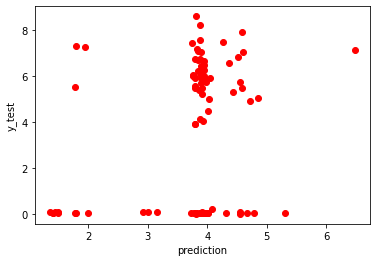

[53.6, 4.3, 54.6, 58.3, 54.5]
[69.7, 71.3, 8.1, 22.5, 33.4]
[55.6, 6.3, 56.6, 60.3, 56.5]
[71.7, 73.3, 10.1, 24.5, 35.4]
[55.6, 6.3, 56.6, 24.5, 35.4]
[55.6, 6.3, 56.6, 24.5, 35.4]
[[14.807228]]
[[55.6, 6.3, 56.6, 24.5, 35.4]]
[[14.9062805]]
[[57.6, 8.3, 58.6, 26.5, 37.4]]
[[15.005339]]
[[59.6, 10.3, 60.6, 28.5, 39.4]]
[[15.1044]]
[[61.6, 12.3, 62.6, 30.5, 41.4]]
[[15.20346]]
[[63.6, 14.3, 64.6, 32.5, 43.4]]
[[15.30252]]
[[65.6, 16.3, 66.6, 34.5, 45.4]]
[[15.40158]]
[[67.6, 18.3, 68.6, 36.5, 47.4]]
[[15.500641]]
[[69.6, 20.3, 70.6, 38.5, 49.4]]
[[15.599701]]
[[71.6, 22.3, 72.6, 40.5, 51.4]]
[[15.698762]]
[[73.6, 24.3, 74.6, 42.5, 53.4]]
[[15.797822]]
[[75.6, 26.3, 76.6, 44.5, 55.4]]
[[15.896882]]
[[77.6, 28.3, 78.6, 46.5, 57.4]]
[[15.995944]]
[[79.6, 30.3, 80.6, 48.5, 59.4]]
[[16.095003]]
[[81.6, 32.3, 82.6, 50.5, 61.4]]
[[16.194063]]
[[83.6, 34.3, 84.6, 52.5, 63.4]]
[[16.293123]]
[[85.6, 36.3, 86.6, 54.5, 65.4]]
[[16.392183]]
[[87.6, 38.3, 88.6, 56.5, 67.4]]
[[16.604937]]
[[89.6, 40.3

In [3]:
ans_num = 5 # desired number of results
num = 50 # repeat num
ans_list = [] # ans_list
node_list = [4,3,2,1] # node_list
model = make_model(node_list, 5)
model1, rmse = train_model(model, x_train, y_train, x_test, y_test, 50, 1000, 20)
repeat_num = 0

while (len(ans_list) < ans_num ):
  print('---------' + str(repeat_num) + '----------------')
  chromosome_list = make_parent(5, 0, 80)
  chromosome_list2 = make_parent(5, 0, 80)

  print(chromosome_list)
  print(chromosome_list2)

  last_chromosome_list = generate_child(model1, chromosome_list, 3)
  last_chromosome_list2 = generate_child(model1, chromosome_list2, 3)

  print(last_chromosome_list)
  print(last_chromosome_list2)

  p3 = selection(last_chromosome_list, last_chromosome_list2)
  print(p3)
  p3 = muatation(p3)
  print(p3)
  ans = replacement(p3, model1)
  
  for i in range(0, num):
      generate_child(model1, p3, 10)
      p3 = muatation(p3)
      ans,p33 = replacement(p3, model1)
      if ans == 1:
        break
  if ans == 1 :
    ans_list.append(p33)
  repeat_num += 1

In [4]:
print(ans_list)

[[[155.6, 100.1, 153.8, 124.5, 135.4]], [[108.5, 139.4, 135.7, 176.5, 164.6]], [[130.5, 112.89999999999999, 166.8, 153.60000000000002, 117.4]], [[142.5, 113.2, 130.8, 153.9, 136.8]], [[117.3, 150.8, 111.9, 166.2, 150.89999999999998]]]
